In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

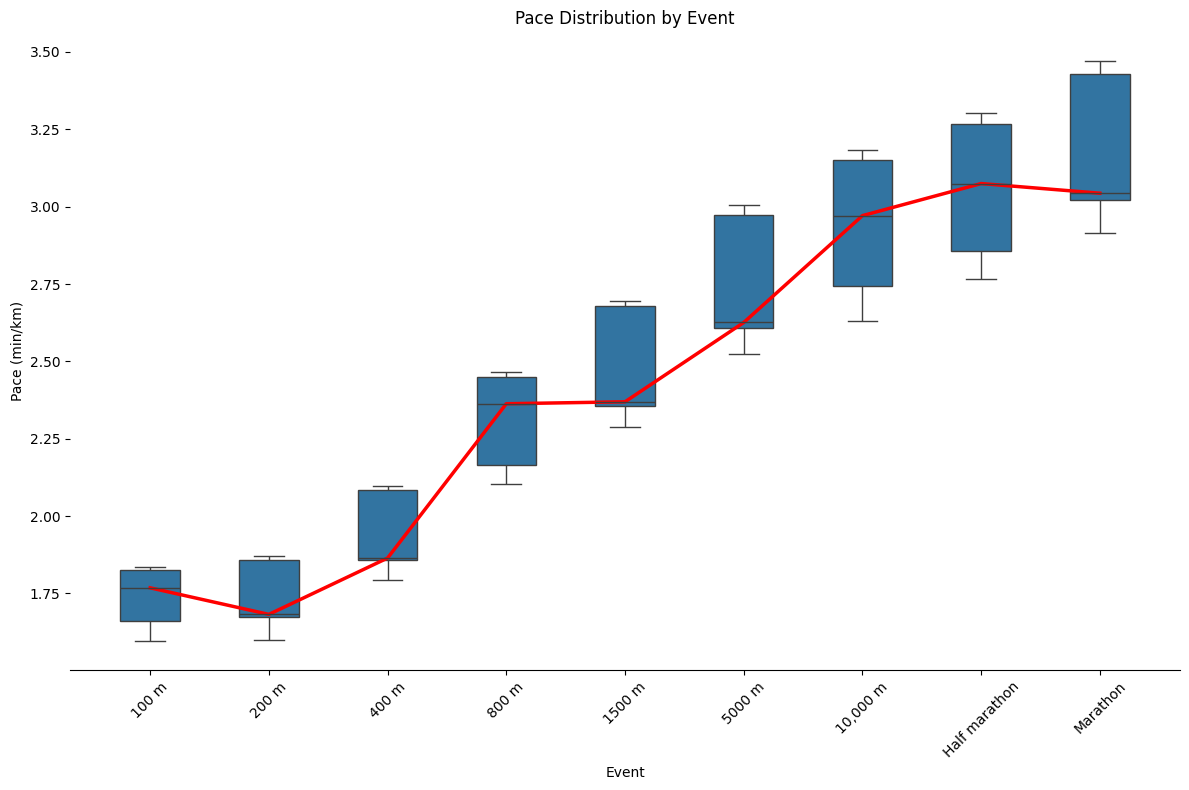

In [16]:
# Define distances for each event in kilometers
distance_km = {
    '100 m': 0.1, '200 m': 0.2, '400 m': 0.4,
    '800 m': 0.8, '1500 m': 1.5, '5000 m': 5,
    '10,000 m': 10, 'Half marathon': 21.0975, 'Marathon': 42.195
}

# Calculate pace in minutes per kilometer
df['Pace_min_km'] = (df['Time_s'] / 60) / df['Event'].map(distance_km)
# Sort events by distance
sorted_events_by_distance = sorted(distance_km.keys(), key=lambda x: distance_km[x])


# Create the boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Event', y='Pace_min_km', data=df, order=sorted_events_by_distance, width=0.5)
plt.title('Pace Distribution by Event')
plt.xlabel('Event')
plt.ylabel('Pace (min/km)')
plt.xticks(rotation=45)


# Calculate the median pace for each event to plot the trend line
median_pace_by_event = df.groupby('Event')['Pace_min_km'].median().reset_index()

# Sort the median pace data by event length
median_pace_by_event['Event'] = pd.Categorical(median_pace_by_event['Event'], categories=sorted_events_by_distance, ordered=True)
median_pace_by_event = median_pace_by_event.sort_values('Event')

# Calculate new x-coordinates for the line plot
new_x_coords = [i for i in range(len(sorted_events_by_distance))]

# Add the trend line for the median pace of each event
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color= 'red', linewidth=2.5)


# Shift the line to the middle of the boxes
for line in ax.lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()

sns.despine(left=True, top=True, right=True)
plt.tight_layout()
plt.show()